# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

   starCount  recipeSellPrice
0          5              800
1          4              983
2          4              735
3          4             1343
4          4              710
5          5              546
6          4              978
7          4              642
8          5              746
9          4              948


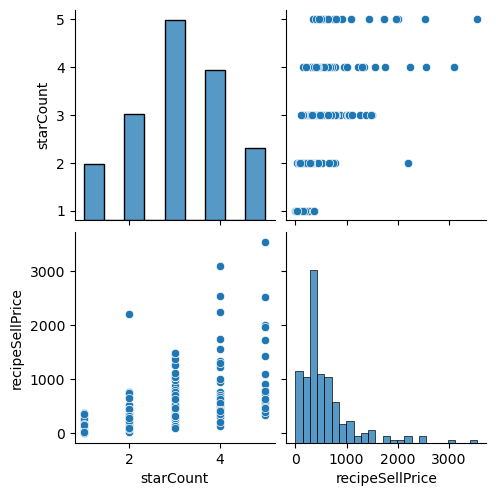

In [2]:
df = pd.read_csv('recipesDataModeling.csv')

print(df.head(10))

sns.pairplot(df)

plt.show()

                 starCount  recipeSellPrice
starCount         1.000000         0.467512
recipeSellPrice   0.467512         1.000000


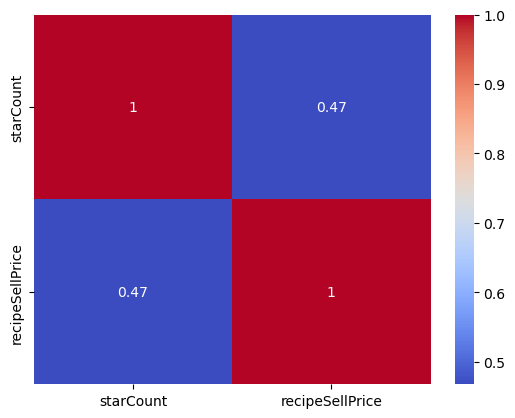

In [3]:
corr_matrix = df.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

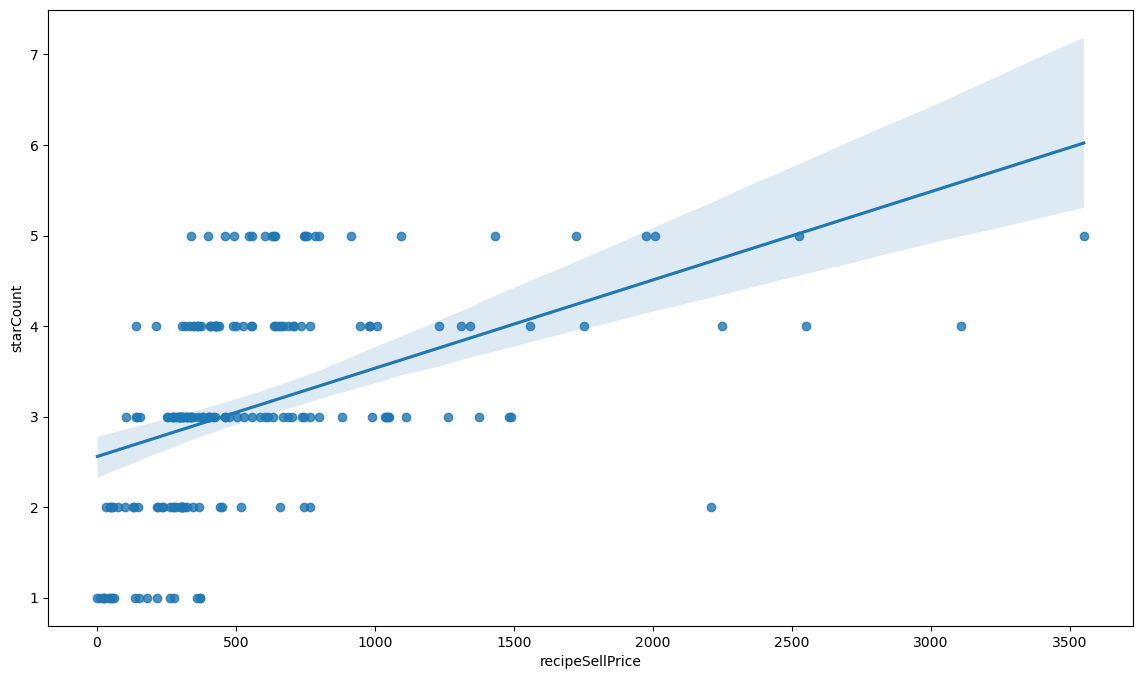

In [4]:
plt.figure(figsize=(14,8))
_ = sns.regplot(data=df, x='recipeSellPrice', y='starCount')

In [5]:
X = df['recipeSellPrice']
y = df['starCount']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train
y_train

12     3
16     5
81     2
64     1
99     5
      ..
87     5
103    2
67     2
24     3
8      5
Name: starCount, Length: 130, dtype: int64

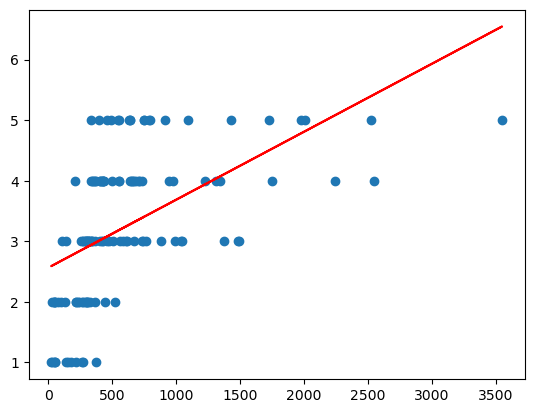

In [6]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

linreg = sm.OLS(y_train, X_train_sm).fit()

#linreg.params


plt.scatter(X_train, y_train)
plt.plot(X_train, 2.564054 + 0.001122*X_train, 'r')
plt.show()

In [7]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              starCount   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     49.17
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.21e-10
Time:                        21:26:33   Log-Likelihood:                -185.59
No. Observations:                 130   AIC:                             375.2
Df Residuals:                     128   BIC:                             380.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.5641      0.130     19.672      0.000       2.306       2.822
recipeSellPrice     0.0011      0.000      7.012      0.000       0.001       0.001
==============================================================================
Omnibus:                        7.195   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                3.274
Skew:                           0.052   Prob(JB):                        0.195
Kurtosis:                       2.229   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Error Terms

Finally, plot your error terms!

<Figure size 640x480 with 0 Axes>

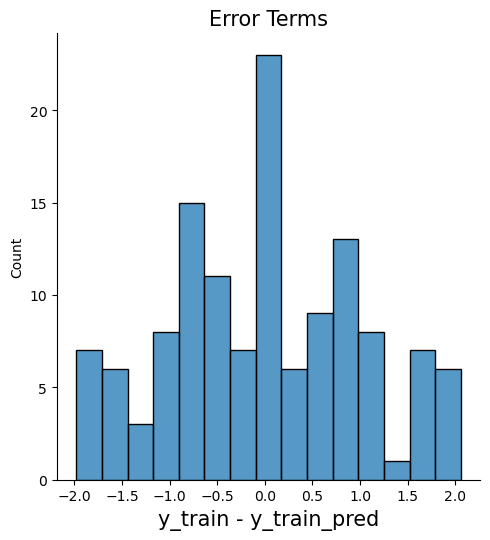

In [8]:
y_train_pred = linreg.predict(X_train_sm)

res = (y_train - y_train_pred)

fig = plt.figure()
sns.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

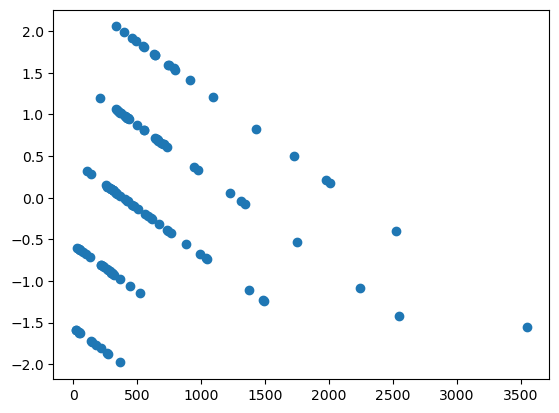

In [9]:
plt.scatter(X_train,res)
plt.show()

In [10]:
#X_test_sm = sm.add_constant(X_test)

#y_test_pred = linreg.predict(X_test_sm)

#y_test_pred

from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

NameError: name 'y_test_pred' is not defined

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? [R-squared:	0.278]
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? [My dataset doesn't benefit much from a linear regression model.]
3. Was your plot of the error terms a bell curve? [Mostly a bell curve]
